## Import library

In [1]:
# from google.colab import drive
# drive.mount('/content/gdrive')
import pandas as pd
from ast import literal_eval
import string
from nltk.tokenize import TweetTokenizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kaishuowang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load data

In [2]:
# Import data
tsd_test = pd.read_csv('../data/tsd_test.csv')

# Convert spans from string to list
tsd_test['spans'] = tsd_test['spans'].apply(literal_eval)

tsd_test.head(10)

,spans,text
0,"[84, 85, 86, 87, 88, 89, 90, 91, 133, 134, 135...",That's right. They are not normal. And I am st...
1,"[81, 82, 83, 84, 85, 86]","""Watch people die from taking away their healt..."
2,[],tens years ago i contacted the PDR and suggest...
3,[],The parallels between the ANC and the Sicilian...
4,[],Intel Community: ‘How can we work for a Presid...
5,"[129, 130, 131, 132, 133, 134]",I live in an area that saw major flood damage ...
6,"[35, 36, 37, 38, 39, 40, 41, 42, 43]",Elaine Marie Jeffers sounds like a sociopath 😕.
7,"[55, 56, 57, 58, 59, 60, 61, 62, 114, 115, 116...",A rock has more mental horsepower than the ind...
8,"[37, 38, 39, 40, 41, 158, 159, 160, 161, 204, ...","Ha ha, HILLARY LOST. All you hillary fools nee..."
9,"[94, 95, 96, 97]",Yes....it is to be expected....oddly enough it...


In [3]:
# Lowercase all characters
tsd_test['text'] = tsd_test['text'].apply(lambda x: x.lower())

# Replace \n by space, so the index won't be effected
# Replace emojis by ?
tsd_test['text'] = tsd_test['text'].apply(lambda x: x.replace('\n', ' '))
tsd_test['text'] = tsd_test['text'].apply(lambda x: x.encode('ascii', 'replace').decode('ascii'))

# Remove punctuations
def remove_punctuation(text):
    punctuationfree = []
    for i in text:
        if i not in string.punctuation:
            punctuationfree.append(i)
        elif i == "'":
            punctuationfree.append(i)
        else:
            punctuationfree.append(' '*len(i))
    if punctuationfree[-1] == ' ':
        punctuationfree = punctuationfree[:-1]
    punctuationfree = ''.join(punctuationfree)
    return punctuationfree

tsd_test['text'] = tsd_test['text'].apply(lambda x: remove_punctuation(x))

tsd_test.head(10)

,spans,text
0,"[84, 85, 86, 87, 88, 89, 90, 91, 133, 134, 135...",that's right they are not normal and i am st...
1,"[81, 82, 83, 84, 85, 86]",watch people die from taking away their healt...
2,[],tens years ago i contacted the pdr and suggest...
3,[],the parallels between the anc and the sicilian...
4,[],intel community how can we work for a presid...
5,"[129, 130, 131, 132, 133, 134]",i live in an area that saw major flood damage ...
6,"[35, 36, 37, 38, 39, 40, 41, 42, 43]",elaine marie jeffers sounds like a sociopath
7,"[55, 56, 57, 58, 59, 60, 61, 62, 114, 115, 116...",a rock has more mental horsepower than the ind...
8,"[37, 38, 39, 40, 41, 158, 159, 160, 161, 204, ...",ha ha hillary lost all you hillary fools nee...
9,"[94, 95, 96, 97]",yes it is to be expected oddly enough it...


## Load dictionary

In [4]:
dictionary = []
f = open('Orthrus_Lexicon.txt', "r")
for x in f:
    dictionary.append(x.replace('\n', ''))
f.close()

In [5]:
print(len(dictionary))
print(dictionary[:10])

1929
['***', '*itches', '4r5e', '5h1t', '5hit', 'God', 'God damn', 'Goddamn', 'a**', 'a*****es']


## Prediction

In [6]:
def get_token(text):
    tknzr2 = TweetTokenizer()
    tmp_tokens = tknzr2.tokenize(text)
    tokens = []
    token_span = []
    for each_token in tmp_tokens:
        if each_token not in string.punctuation:
            tokens.append(each_token)
            if len(token_span) != 0:
                tmp = text[token_span[len(token_span)-1][-1]+1:]
                start = tmp.find(each_token) + token_span[len(token_span)-1][-1]+1
                token_span.append(list(range(start, start + len(each_token))))
            else:
                token_span.append(list(range(0, len(each_token))))
    return tokens, token_span

In [7]:
def prediction(df):
    predicted_spans = []
    for index, row in df.iterrows():
        span = []
        tokens, token_span = get_token(row['text'])
        for i in range(0, len(tokens)):
            if tokens[i] in dictionary:
                span += token_span[i]
        predicted_spans.append(span)
    return predicted_spans

In [8]:
predicted_spans = prediction(tsd_test)
tsd_test['predicted_spans'] = predicted_spans
tsd_test.head(10)

,spans,text,predicted_spans
0,"[84, 85, 86, 87, 88, 89, 90, 91, 133, 134, 135...",that's right they are not normal and i am st...,"[118, 119, 120, 121, 122, 123, 126, 127, 128, ..."
1,"[81, 82, 83, 84, 85, 86]",watch people die from taking away their healt...,"[81, 82, 83, 84, 85, 86]"
2,[],tens years ago i contacted the pdr and suggest...,"[448, 483, 484, 485, 486, 487, 488, 489, 490]"
3,[],the parallels between the anc and the sicilian...,"[47, 48, 49, 50, 51, 413, 414, 415, 416, 417, ..."
4,[],intel community how can we work for a presid...,"[135, 136, 137, 138, 139, 141, 142, 143, 144, ..."
5,"[129, 130, 131, 132, 133, 134]",i live in an area that saw major flood damage ...,"[129, 130, 131, 132, 133, 134]"
6,"[35, 36, 37, 38, 39, 40, 41, 42, 43]",elaine marie jeffers sounds like a sociopath,"[35, 36, 37, 38, 39, 40, 41, 42, 43]"
7,"[55, 56, 57, 58, 59, 60, 61, 62, 114, 115, 116...",a rock has more mental horsepower than the ind...,"[16, 17, 18, 19, 20, 21, 55, 56, 57, 58, 59, 6..."
8,"[37, 38, 39, 40, 41, 158, 159, 160, 161, 204, ...",ha ha hillary lost all you hillary fools nee...,"[37, 38, 39, 40, 41, 134, 135, 136, 137, 204, ..."
9,"[94, 95, 96, 97]",yes it is to be expected oddly enough it...,"[94, 95, 96, 97]"


## Evaluation

In [9]:
# Define evaluation functions

import sys
from scipy.stats import sem
import numpy as np
from ast import literal_eval

def f1(predictions, gold):
    """
    F1 (a.k.a. DICE) operating on two lists of offsets (e.g., character).
    >>> assert f1([0, 1, 4, 5], [0, 1, 6]) == 0.5714285714285714
    :param predictions: a list of predicted offsets
    :param gold: a list of offsets serving as the ground truth
    :return: a score between 0 and 1
    """
    if len(gold) == 0:
        return 1. if len(predictions) == 0 else 0.
    if len(predictions) == 0:
        return 0.
    predictions_set = set(predictions)
    gold_set = set(gold)
    nom = 2 * len(predictions_set.intersection(gold_set))
    denom = len(predictions_set) + len(gold_set)
    return float(nom)/float(denom)


def evaluate(pred, gold):
    """
    Based on https://github.com/felipebravom/EmoInt/blob/master/codalab/scoring_program/evaluation.py
    :param pred: file with predictions
    :param gold: file with ground truth
    :return:
    """
    # read the predictions
    pred_lines = pred.readlines()
    # read the ground truth
    gold_lines = gold.readlines()

    # only when the same number of lines exists
    if (len(pred_lines) == len(gold_lines)):
        data_dic = {}
        for n, line in enumerate(gold_lines):
            parts = line.split('\t')
            if len(parts) == 2:
                data_dic[int(parts[0])] = [literal_eval(parts[1])]
            else:
                raise ValueError('Format problem for gold line %d.', n)

        for n, line in enumerate(pred_lines):
            parts = line.split('\t')
            if len(parts) == 2:
                if int(parts[0]) in data_dic:
                    try:
                        data_dic[int(parts[0])].append(literal_eval(parts[1]))
                    except ValueError:
                        # Invalid predictions are replaced by a default value
                        data_dic[int(parts[0])].append([])
                else:
                    raise ValueError('Invalid text id for pred line %d.', n)
            else:
                raise ValueError('Format problem for pred line %d.', n)

        # lists storing gold and prediction scores
        scores = []
        for id in data_dic:
            if len(data_dic[id]) == 2:
                gold_spans = data_dic[id][0]
                pred_spans = data_dic[id][1]
                scores.append(f1(pred_spans, gold_spans))
            else:
                sys.exit('Repeated id in test data.')

        return (np.mean(scores), sem(scores))

    else:
        sys.exit('Predictions and gold data have different number of lines.')

In [10]:
tsd_test["f1_scores"] = tsd_test.apply(lambda row: f1(row.predicted_spans, row.spans), axis=1)
tsd_test.head(10)

,spans,text,predicted_spans,f1_scores
0,"[84, 85, 86, 87, 88, 89, 90, 91, 133, 134, 135...",that's right they are not normal and i am st...,"[118, 119, 120, 121, 122, 123, 126, 127, 128, ...",0.565217
1,"[81, 82, 83, 84, 85, 86]",watch people die from taking away their healt...,"[81, 82, 83, 84, 85, 86]",1.000000
2,[],tens years ago i contacted the pdr and suggest...,"[448, 483, 484, 485, 486, 487, 488, 489, 490]",0.000000
3,[],the parallels between the anc and the sicilian...,"[47, 48, 49, 50, 51, 413, 414, 415, 416, 417, ...",0.000000
4,[],intel community how can we work for a presid...,"[135, 136, 137, 138, 139, 141, 142, 143, 144, ...",0.000000
5,"[129, 130, 131, 132, 133, 134]",i live in an area that saw major flood damage ...,"[129, 130, 131, 132, 133, 134]",1.000000
6,"[35, 36, 37, 38, 39, 40, 41, 42, 43]",elaine marie jeffers sounds like a sociopath,"[35, 36, 37, 38, 39, 40, 41, 42, 43]",1.000000
7,"[55, 56, 57, 58, 59, 60, 61, 62, 114, 115, 116...",a rock has more mental horsepower than the ind...,"[16, 17, 18, 19, 20, 21, 55, 56, 57, 58, 59, 6...",0.723404
8,"[37, 38, 39, 40, 41, 158, 159, 160, 161, 204, ...",ha ha hillary lost all you hillary fools nee...,"[37, 38, 39, 40, 41, 134, 135, 136, 137, 204, ...",0.588235
9,"[94, 95, 96, 97]",yes it is to be expected oddly enough it...,"[94, 95, 96, 97]",1.000000


F1 = 0.62 ± 0.01


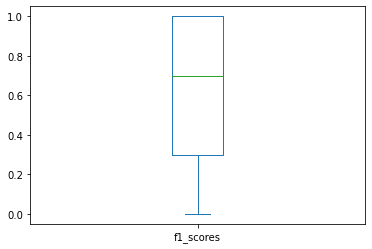

In [11]:
from scipy.stats import sem
_ = tsd_test.f1_scores.plot(kind="box")
print (f"F1 = {tsd_test.f1_scores.mean():.2f} ± {sem(tsd_test.f1_scores):.2f}")

In [12]:
# make sure that the ids match the ones of the scores
predictions = tsd_test.predicted_spans.to_list()
ids = tsd_test.index.to_list()

# write in a prediction file named "spans-pred.txt"
with open("spans-pred.txt", "w") as out:
  for uid, text_scores in zip(ids, predictions):
    out.write(f"{str(uid)}\t{str(text_scores)}\n")

! head spans-pred.txt

0	[118, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 133, 134, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 146]
1	[81, 82, 83, 84, 85, 86]
2	[448, 483, 484, 485, 486, 487, 488, 489, 490]
3	[47, 48, 49, 50, 51, 413, 414, 415, 416, 417, 418, 419, 420, 432, 433, 434, 435, 436, 437, 523, 524, 525, 526, 527]
4	[135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 271, 272, 273, 274, 437, 438, 439, 440, 441, 442, 443, 473, 474, 475, 476, 477, 478, 479, 480, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 663, 664, 665, 666, 667, 668, 669]
5	[129, 130, 131, 132, 133, 134]
6	[35, 36, 37, 38, 39, 40, 41, 42, 43]
7	[16, 17, 18, 19, 20, 21, 55, 56, 57, 58, 59, 60, 61, 62, 114, 115, 116, 117, 118, 119, 120, 121, 122]
8	[37, 38, 39, 40, 41, 134, 135, 136, 137, 204, 205, 206, 207, 208, 321, 322, 323, 324, 325, 326]
9	[94, 95, 96, 97]


In [13]:
gold = tsd_test.spans.to_list()
ids = tsd_test.index.to_list()

# write in a prediction file named "spans-pred.txt"
with open("spans-gold.txt", "w") as out:
  for uid, text_scores in zip(ids, gold):
    out.write(f"{str(uid)}\t{str(text_scores)}\n")

! head spans-gold.txt

0	[84, 85, 86, 87, 88, 89, 90, 91, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146]
1	[81, 82, 83, 84, 85, 86]
2	[]
3	[]
4	[]
5	[129, 130, 131, 132, 133, 134]
6	[35, 36, 37, 38, 39, 40, 41, 42, 43]
7	[55, 56, 57, 58, 59, 60, 61, 62, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129]
8	[37, 38, 39, 40, 41, 158, 159, 160, 161, 204, 205, 206, 207, 208]
9	[94, 95, 96, 97]


In [14]:
predictions = open("spans-pred.txt", "r")
gold = open("spans-gold.txt", "r")

score = evaluate(predictions, gold)
print(score)

(0.6170636144595064, 0.00882032908916365)
